<a href="https://colab.research.google.com/github/PTC-Education/PTC-API-Playground/blob/main/Transformation_Matrices_Lesson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview
This lesson is designed to teach you the basic concepts of transformation matrices, a mathematical tool used in applications like robotics and graphics to describe and control how rigid bodies are translated and rotated in space.
### Prior Knowledge
You should have a basic understanding of the following topics in order to follow this lesson:

*   Linear algebra
*   Matrix multiplication
*   Trigonomotry
*   Cartesian reference frames




# What is a Transformation Matrix

Transformation matrices offer a way to translate and rotate bodies relative to each other. In the examples below we are going to transform a rigid body with reference frame 
$\hat{A} = \begin{bmatrix}
x \\ y \\ z
\end{bmatrix}$
to reference frame
$\hat{B} = \begin{bmatrix}
x' \\ y' \\ z'
\end{bmatrix}$

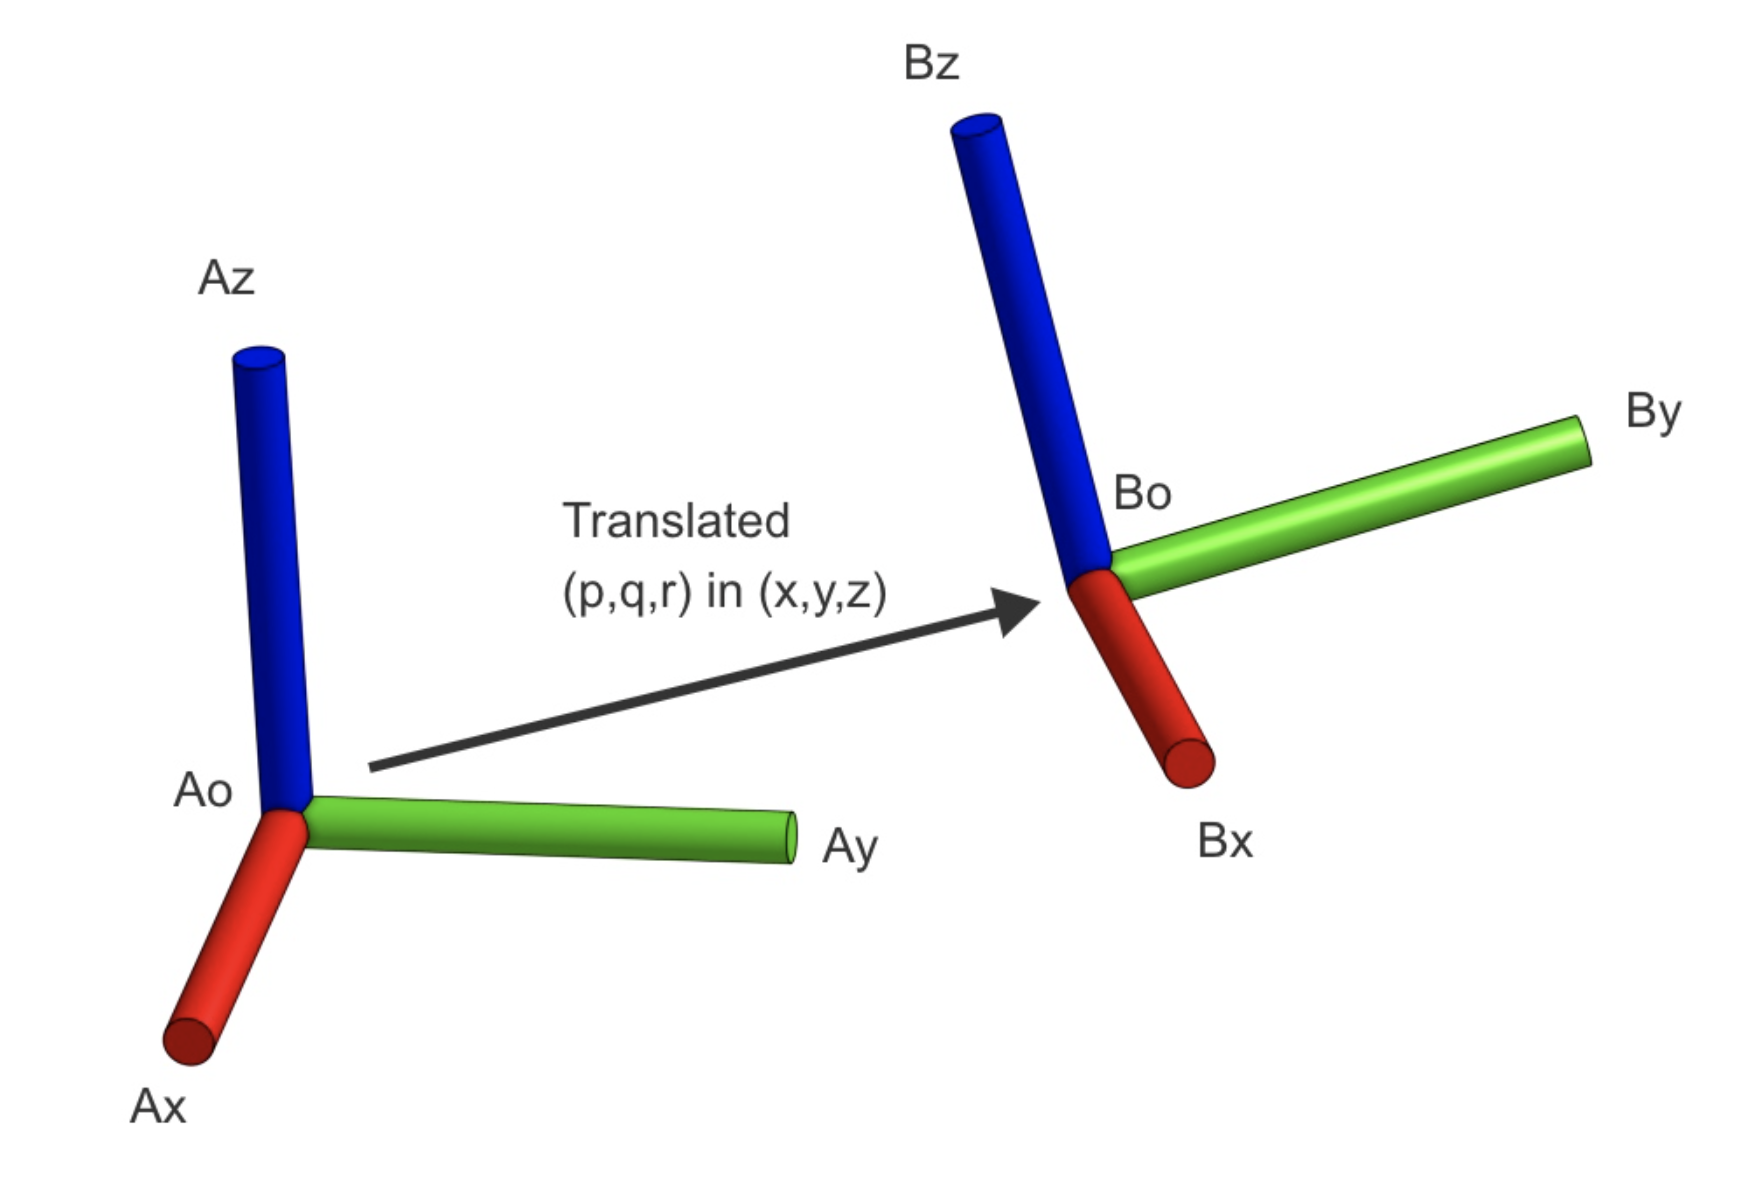

> ### Translation
> This would be an example of a "translation" in space, meaning the orientaiton of the (x,y,z) reference frame stays the same relative to the world, but the origin is moved by (p,q,r) in the (x,y,z) direction, respectively.    
> $\begin{bmatrix}
x' \\ y' \\ z' \\ 1
\end{bmatrix} = 
\begin{bmatrix}
1 & 0 & 0 & p\\
0 & 1 & 0 & q\\
0 & 0 & 1 & r\\
0 & 0 & 0 & 1\\
\end{bmatrix} * 
\begin{bmatrix}
x \\ y \\ z \\ 1
\end{bmatrix}$

> ### Rotation
>The values in a rotation matrix are equal to the cosine of the angle between each of the unit vectors for reference frame $\hat{A}$ and reference frame $\hat{B}$, which is the same as calculating the dot product between each of the unit vectors. A simple rotation in three dimensions looks as follows:
>
> $\begin{bmatrix}
x' \\ y' \\ z' \\ 1
\end{bmatrix} = 
\begin{bmatrix}
\hat{A_x}\cdot\hat{B_x} & \hat{A_x}\cdot\hat{B_y} & \hat{A_x}\cdot\hat{B_z} & 0\\
\hat{A_y}\cdot\hat{B_x} & \hat{A_y}\cdot\hat{B_y} & \hat{A_y}\cdot\hat{B_z} & 0\\
\hat{A_z}\cdot\hat{B_x} & \hat{A_z}\cdot\hat{B_y} & \hat{A_z}\cdot\hat{B_z} & 0\\
0 & 0 & 0 & 1\\
\end{bmatrix} * 
\begin{bmatrix}
x \\ y \\ z \\ 1
\end{bmatrix}$
>
>Alternatively, you can express a rotation matrix as a rotation of angle $\alpha$ around a vector $\hat{C} = \begin{bmatrix}
x & y & z
\end{bmatrix}$ as follows:
> $\begin{bmatrix}
x' \\ y' \\ z' \\ 1
\end{bmatrix} = 
\begin{bmatrix}
1-2*(\hat{C_y}^2+\hat{C_z}^2)*sq & 2*(\hat{C_x}*\hat{C_y}*sq - \hat{C_z}*sc) & 2*(\hat{C_x}*\hat{C_z}*sq + \hat{C_y}*sc) & 0\\
2*(\hat{C_x}*\hat{C_y}*sq + \hat{C_z}*sc) & 1-2*(\hat{C_x}^2+\hat{C_z}^2)*sq & 2*(\hat{C_y}*\hat{C_z}*sq - \hat{C_x}*sc) & 0\\
2*(\hat{C_x}*\hat{C_z}*sq - \hat{C_y}*sc) & 2*(\hat{C_y}*\hat{C_z}*sq + \hat{C_x}*sc) & 1-2*(\hat{C_x}^2+\hat{C_y}^2)*sq & 0\\
0 & 0 & 0 & 1\\
\end{bmatrix} * 
\begin{bmatrix}
x \\ y \\ z \\ 1
\end{bmatrix}$
>
> where $sq = \sin^2(\alpha / 2)$ and $sc = \sin(\alpha / 2)*\cos(\alpha / 2)$

## Full Transformation
Putting those pieces together, we get the general form of a rotation matrix that translates and rotates from reference frame 
$\hat{A} = \begin{bmatrix}
x \\ y \\ z
\end{bmatrix}$
to reference frame
$\hat{B} = \begin{bmatrix}
x' \\ y' \\ z'
\end{bmatrix}$ to be the following: 
### $\begin{bmatrix}
x' \\ y' \\ z' \\ 1
\end{bmatrix} = 
\begin{bmatrix}
r_{xx} & r_{xy} & r_{xz} & p\\
r_{yx} & r_{yy} & r_{yz} & q\\
r_{zx} & r_{zy} & r_{zz} & r\\
0 & 0 & 0 & 1\\
\end{bmatrix} * 
\begin{bmatrix}
x \\ y \\ z \\ 1
\end{bmatrix}$




# Connect to Onshape
### Import libraries
Start by running the code block below to import all libraries necessary to interact with Onshape's API.

In [ ]:
# Github Installation and fresh requirements install

!rm -r OnshapeColab
## If this is your first time running this cell the output should be
##   "rm: cannot remove 'OnshapeColab': No such file or directory"

print("*** Installing git repo . . . ***")
!git clone https://github.com/imnotartsy/OnshapeColab

print("\n*** Installing external dependencies . . . ***")
!pip install -r OnshapeColab/requirements.txt

print("\n*** Repository and requirements installed sucessfully! ***")

# Connect to Onshape
import OnshapeColab as oc

rm: cannot remove 'OnshapeColab': No such file or directory
*** Installing git repo . . . ***
Cloning into 'OnshapeColab'...
remote: Enumerating objects: 988, done.
remote: Counting objects: 100% (988/988), done.
remote: Compressing objects: 100% (494/494), done.
remote: Total 988 (delta 598), reused 846 (delta 475), pack-reused 0
Receiving objects: 100% (988/988), 214.33 KiB | 770.00 KiB/s, done.
Resolving deltas: 100% (598/598), done.

*** Installing external dependencies . . . ***
     |████████████████████████████████| 2.1MB 4.0MB/s 
     |████████████████████████████████| 215kB 23.8MB/s 
     |████████████████████████████████| 112kB 19.0MB/s 
     |████████████████████████████████| 133kB 17.7MB/s 
     |████████████████████████████████| 552kB 17.8MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.

### Connect to API
Please replace the parameters below to match the Onshape document you'd like to interact with, as well as API Keys generated in [Onshape's developer portal](https://dev-portal.onshape.com/keys).
**Note**: For this example, the connected Onshape url should be of an assembly with at least one part in it.

In [ ]:
## Document identifiers

### Translatiotion test
# (https://cad.onshape.com/documents/0b15b64be5e54bc64d6fb3ff/w/8653864b34cbf101c1c0acb1/e/58703372dd872b5ec7f548a2)
did = "b61ef05ac53f06fe515e6022"
wid = "f38b2584886488dfce4181f6"
eid = "98eec9b7462b43132f2d637a"

## Onshape API keys
access ="<access key>"
secret = "<secret key>"

## Connects to Onshape API
oc.connectToOnshape(did, wid, eid, access, secret, verbose=True)

. . . Defaulting to cad.onshape.com . . .
Using Workbench: https://cad.onshape.com
Document ID: b61ef05ac53f06fe515e6022
Workspace ID: f38b2584886488dfce4181f6
Element ID: 98eec9b7462b43132f2d637a

Connected to Onshape Client!

 *** WARNING: Check your did, access, and secret keys have been entered correctly! *** 
Sever message: 
Ending. . .


NameError: ignored

# Get Onshape Assembly Transformations


Run the cell below to get the translation and rotation of the parts in your assembly relative to their position in their part studio. Try running the cell, then moving the parts around in the assembly, then running the cell again to see how they change.
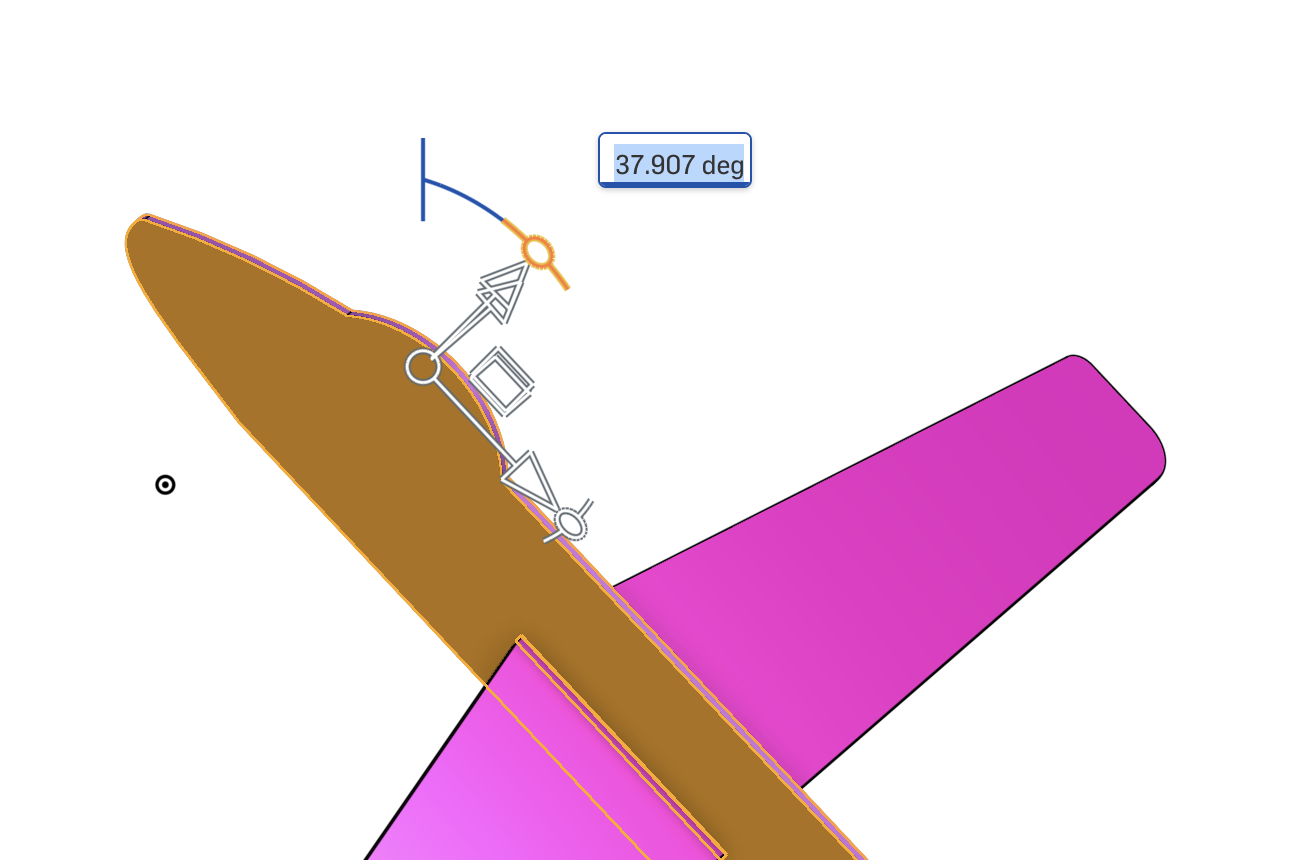

In [ ]:
# Get Parts and Configurations

## Gets Assembly (parts and positions) information
## Note: Assembly info prints all the parts and sub assemblies!
assemblyInfo = oc.getAssemblyInfo()
oc.printAssembly(assemblyInfo, positions=True)

### Challenge
Can you convert the translation and rotation values given by the cell above into a 4x4 transformation matrix of the form shown above? You can check your answer by running the cell below.

In [ ]:
# transArg = [tx, ty, tz, rx, ry, rz, alpha]
transArg = [0, -.1, 0, 
            0, 0, 0, 0]
M = oc.getTranslationMatrix(transArg)
oc.prettyPrintMatrix(M)

# Send Tranformation Matrix to Onshape Assembly

There are a number of ways you can set a transformation matrix to be sent to parts in Onshape. The first way is to set the transArg, which converts to a full 4x4 transformation matrix

In [ ]:
# Setting transformations

## TransArgs are internal data structure representing the following:
# [tx, ty, tz, rx, ry, rz, alpha]
# These are used to create transformation matrices

## Automatic TransArg
transArg = oc.promptTransArg(assemblyInfo)

In [ ]:
## OR Manual setting of TransArg
transArg = [0, -.1, 0, 0, 0, 0, 0]

In [ ]:
# Manually setting transformations from a manual translation matrix


## A Transformation Matrix is a 16x1 array that represents a 4x4 array.
## https://drafts.csswg.org/css-transforms-2/#mathematical-description
## https://pages.mtu.edu/~shene/COURSES/cs3621/NOTES/geometry/geo-tran.html 

## Automatic get Transformation Matrix (from transArg)
M = oc.getTranslationMatrix(transArg)

## Print your transformation
oc.prettyPrintMatrix(M)

In [ ]:
## OR Manual setting of a Transformation Matrix
M = [
   1.0,     0.0,     0.0,     0  ,
   0.0,     1.0,     0.0,     0.1,
   0.0,     0.0,     1.0,     0  ,
   0.0,     0.0,     0.0,     1.0
]

## Print your transformation
oc.prettyPrintMatrix(M)

## Double check your matrix! / TODO
# oc.checkMatrix(M, verbose=True)

Once the transformation matrix has been set with one of the above methods, you can apply the transformation to the Onshape assembly by running one of the cells below.

In [ ]:
## Automatic Get parts list
parts = oc.promptParts(assemblyInfo)

In [ ]:
## Manual setting of parts list (Array of part ids (each part id is an array
##   of part/subassembly ids)
parts = [['MkbliODWwWA2T80sc']]

In [ ]:
## Boolean variable representing if a transform is relative
isRelative = True

## Make API Call
oc.postTransform(M, isRelative, parts)